In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bucket import create_bucket_synopsis
from lloyd import initialize_spherical_clusters, getClosestCenter
from util import normalise

In [2]:
def lloyd_with_weights(k: int, X: pd.DataFrame, weights: pd.DataFrame, n_iter: int):
    # initalise centers
    C = initialize_spherical_clusters(k, X.shape[1], radius=1)
    # repeat for n_iter for each cluster:
    for _ in range(0, n_iter):
        # assign each point to its closest center
        assignments = X.apply(lambda row: getClosestCenter(row, C), axis=1)
        # update center to be the average of all points assigned
        for i in range(0, len(C)):
            if (assignments == i).any():
                C.iloc[i, :] = (X[assignments == i].mul(weights[assignments == i], axis=0).sum()) / (weights[assignments==i].sum())
    return C

In [9]:
data = normalise(pd.DataFrame(np.concat(
    [np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=200),
    np.random.multivariate_normal(mean=[5,5], cov=[[1,0],[0,1]], size=200),
    np.random.multivariate_normal(mean=[5,0], cov=[[1,0],[0,1]], size=200)]
)))

weighted_data = create_bucket_synopsis(data, 1, 2, 5, 10, 1)
centers = pd.DataFrame(lloyd_with_weights(3, weighted_data.iloc[:, :2], weighted_data[2], n_iter=2))
print(weighted_data)
print(centers)


            0          1           2
0    0.008210  -0.133104   80.598904
1    0.655646  -0.608252   53.858777
2   -1.396584   1.048287   -9.765511
3   -3.249657   1.142010   -2.535326
4    0.235005  -0.218840  152.412090
5    0.211829   0.406660   97.638588
6   -0.318068  -0.371381   -5.633776
7    0.391152   0.297093  135.105462
8    0.010962   0.016804   70.832816
9   -0.572280  -0.166756   36.805653
10  -0.807195  -0.275305   69.913480
11  -0.249631   1.358256   -3.874247
12  -0.402667  -0.730502   30.922761
13  14.814280  -1.470506   -1.044979
14   0.356851  13.894349    0.617160
          0         1
0  0.197012 -0.263465
1  0.251376  0.280859
2 -0.553678 -0.492989


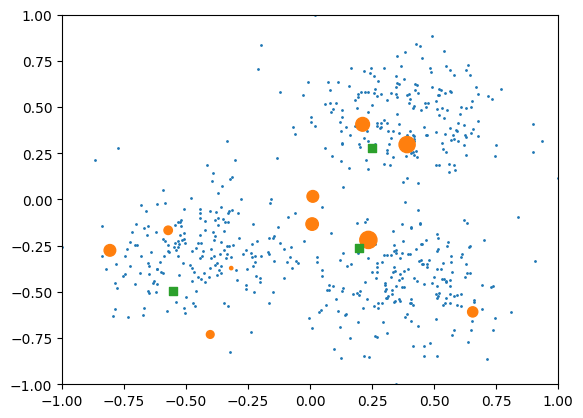

In [10]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(x=data[0], y=data[1], s=1)
plt.scatter(x=weighted_data[0], y=weighted_data[1], s=np.abs(weighted_data[2]))
plt.scatter(x=centers[0], y=centers[1], marker="s")

In [7]:
initialize_spherical_clusters(3, weighted_data.iloc[:, :2].shape[1], radius=1)

,x1,x2
0,0.281180,-0.959655
1,0.623681,0.781679
2,-0.831757,-0.555140
